# When does a paired t.test give t=0 and p=1?

The formula for a one-sample t.test (i.e. is the variable different from 0):

    mean(x)/(sd(x)/sqrt(length(x)))

The formula for a paired t.test is the same except it looks at differences between each data point:

    mean(x-y)/(sd(x-y)/sqrt(length(x-y)))
    
## Test 1: if we have data that is esssentially the same, 1:1 line, R² of 1:

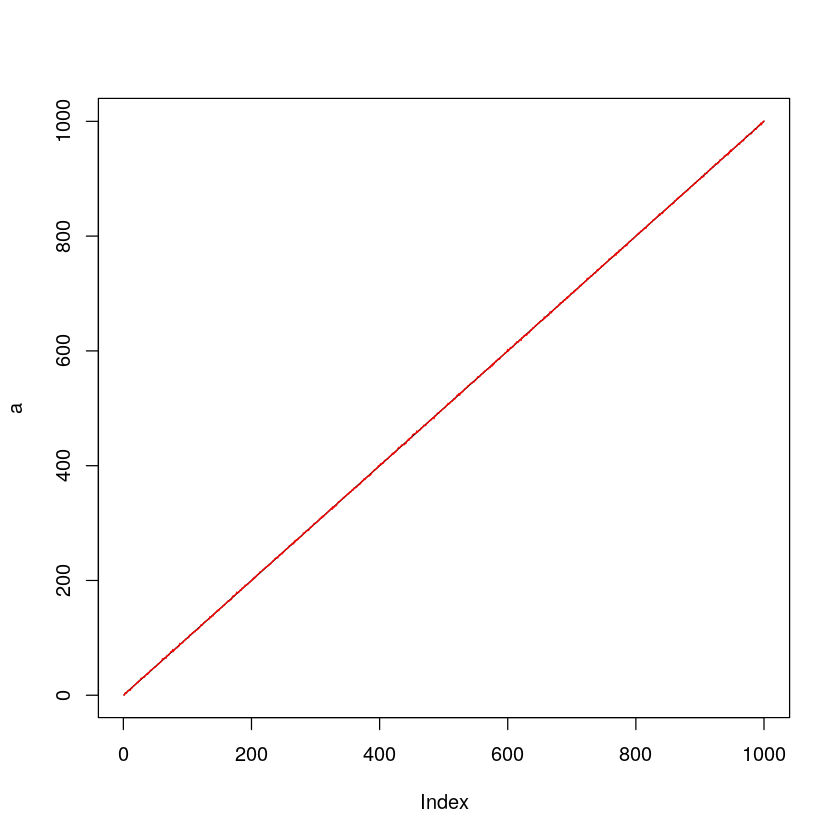

In [20]:
set.seed(0x714681a)
a = 1:1000
b = a + rnorm(1000)
plot(a, type="l")
lines(b, col="red")

In [21]:
t.test(a, b, paired=TRUE)


	Paired t-test

data:  a and b
t = 0.47358, df = 999, p-value = 0.6359
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04678863  0.07655559
sample estimates:
mean of the differences 
             0.01488348 


Close to 1 but **not completely 1**, because while their means are almost the same, the standard deviation is very low too!

In [24]:
abdiff = a-b
mean(abdiff)

[1] 0.01488348

In [25]:
sd(abdiff)/sqrt(length(abdiff))

[1] 0.03142782

## Test 2: if we have very different data but their means turn out to be the same

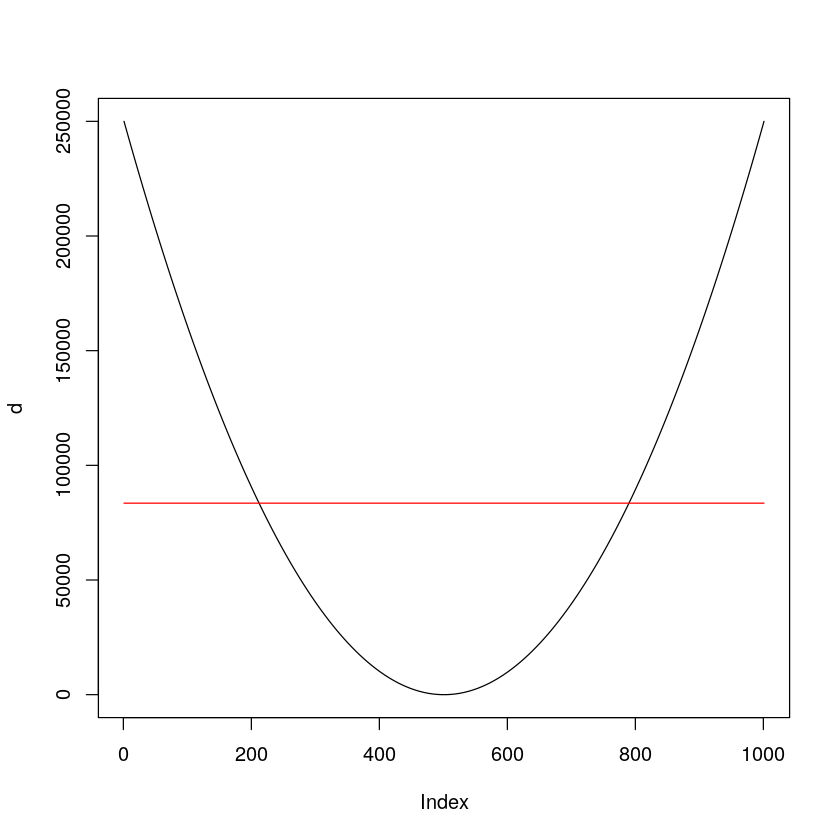

In [26]:
d = (-500:500)^2
e = rep(mean(d), length(d))
plot(d, type="l")
lines(e, col="red")

In [27]:
t.test(d, e, paired=TRUE)


	Paired t-test

data:  d and e
t = 0, df = 1000, p-value = 1
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4634.521  4634.521
sample estimates:
mean of the differences 
                      0 


The two variables are very different (sd is large), but their means are exactly the same, thus t=0!

## Another example

Two variables that are sometimes the same and sometimes opposite (thus sd > 0), but their means are the same.

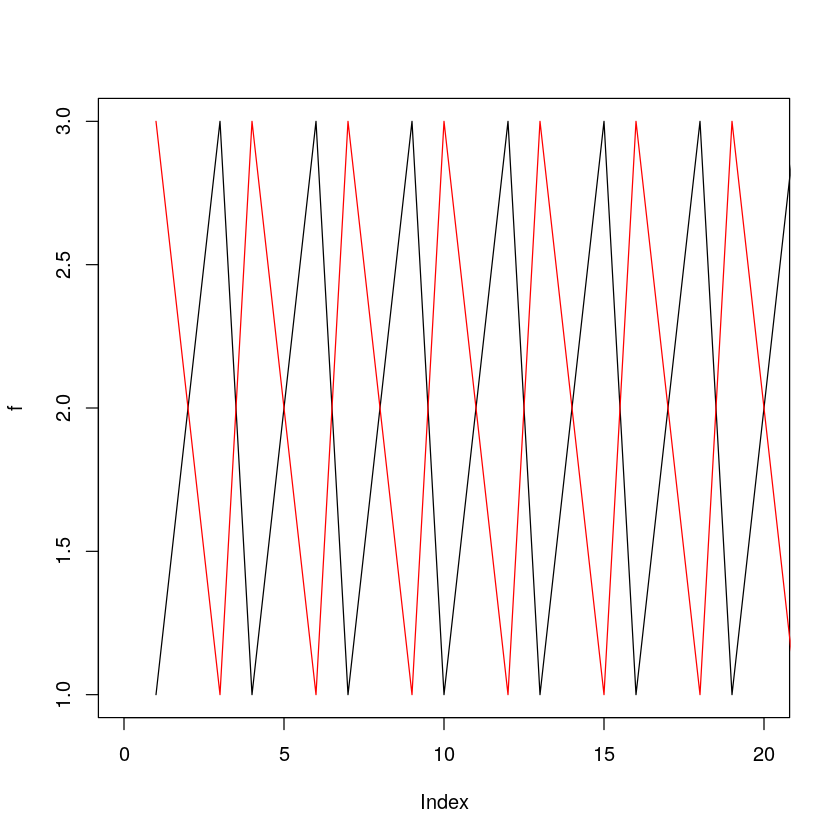

In [35]:
f = rep(1:3, 300)
g = rep(3:1, 300)
plot(f, type="l", xlim=c(0, 20)) # Zoom to first 20 for clarity
lines(g, col="red")

In [36]:
t.test(f, g, paired=TRUE)


	Paired t-test

data:  f and g
t = 0, df = 899, p-value = 1
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1068902  0.1068902
sample estimates:
mean of the differences 
                      0 
